#Question 2

The Diabetes dataset from scikit-learn contains 442 samples with 10 baseline features (age, sex, BMI, blood pressure, and six blood serum measurements), which are real-valued and scaled to the range \(-0.2 < x < 0.2\). The target variable, representing disease progression, is an integer ranging from 25 to 346. It is commonly used for regression tasks to predict diabetes progression based on the features.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##BMI feature

In [14]:
diabetes = load_diabetes()

#For this first test I will only use the BMI feature to compare after the results
#obtained with all the features, in the second case it will not be possible to plot
#a graph representing the regression line in 2 dimensions
x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=23)

model = LinearRegression().fit(xTrain, yTrain)

In [15]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
yPred = model.predict(xTest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

In [17]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3887.83
R^2 Score: 0.34


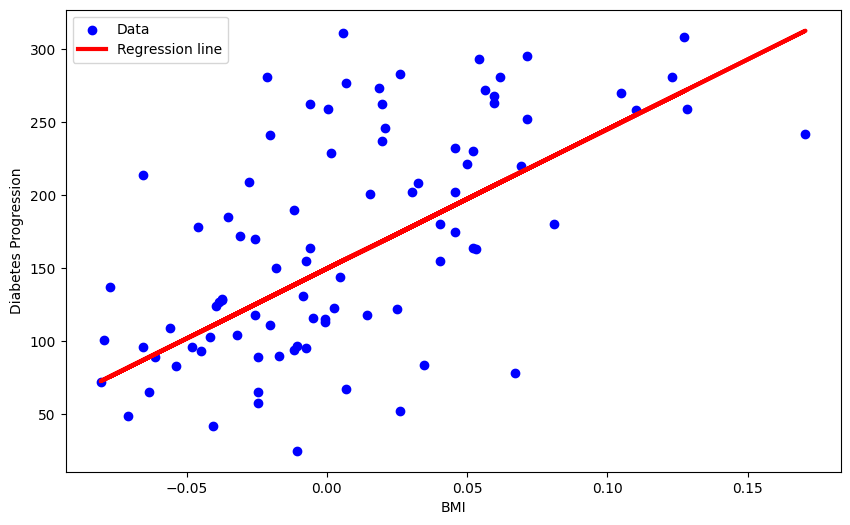

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(xTest, yTest, color='blue', label='Data')
plt.plot(xTest, yPred, color='red', linewidth=3, label='Regression line')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

##All features

In [19]:
diabetes = load_diabetes()

x = diabetes.data
y = diabetes.target

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=23)

model = LinearRegression().fit(xTrain, yTrain)

In [20]:
yPred = model.predict(xTest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

In [21]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 3171.59
R^2 Score: 0.46


#Question 3

 Here is exercise 3 with the associated plot.

In [22]:
x = np.array([132, 129, 120, 113.2, 105, 92, 84, 83.2, 88.4, 59, 80, 81.5, 71, 69.2])
y = np.array([46, 48, 51, 52.1, 54, 52, 59, 58.7, 61.6, 64, 61.4, 54.6, 58.8, 58])

n = len(x)
sumX = np.sum(x)
sumY = np.sum(y)
sumXY = np.sum(x * y)
sumX2 = np.sum(x ** 2)

theta1 = (sumXY - (sumX * sumY) / n) / (sumX2 - (sumX ** 2) / n)
theta0 = (sumY - theta1 * sumX) / n

#Another possibility is to calculate the covariance of x and y and the variance of y
#using numpy functions
#covXY = np.cov(x, y)[0, 1]
#varX = np.var(x)
#theta1 = covXY / varX

print(f"The regression line is: y = {theta1:.4f}x + {theta0:.4f}")

The regression line is: y = -0.2094x + 75.2124


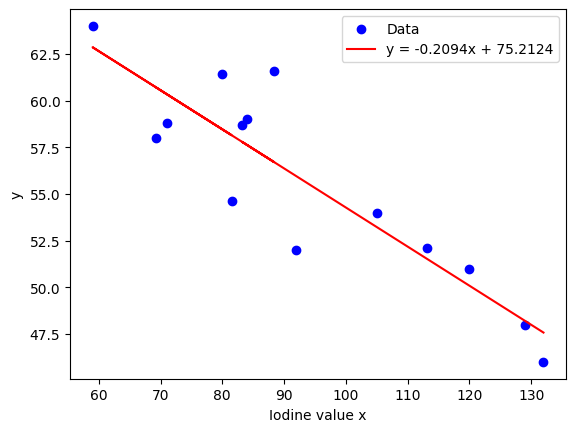

In [23]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, theta1 * x + theta0, color='red', label=f'y = {theta1:.4f}x + {theta0:.4f}')
plt.xlabel('Iodine value x')
plt.ylabel('y')
plt.legend()
plt.show()